# Install AMPL

In [1]:
! pip install rdkit-pypi
! pip install deepchem

import deepchem
print(deepchem.__version__)
! pip install umap
! pip install llvmlite
! pip install umap-learn
! pip install molvs
! pip install bravado

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 162 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 693 kB 13.6 MB/s 
     |████████████████████████████████| 29.3 MB 201 kB/s 


2.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=1f7200f9c6078c7af5e30a3b57807f4a935410556d35787f71e39c65573b5472
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=162e9d71505858be7222e53fdf1e8b80ce2ba7f01a60a488d1850e2fab017e63
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=

In [2]:
import deepchem as dc

# get the Install AMPL_GPU_test.sh
!wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh'

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2022-12-06 21:39:45--  https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179 [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]     179  --.-KB/s    in 0s      

2022-12-06 21:39:45 (4.35 MB/s) - ‘install_AMPL_GPU_test.sh’ saved [179/179]

Cloning into 'AMPL'...
remote: Enumerating objects: 7615, done.
remote: Counting objects: 100% (1004/1004), done.
remote: Compressing objects: 100% (479/479), done.
remote: Total 7615 (delta 561), reused 864 (delta 510), pack-reused 6611
Receiving objects: 100% (7615/7615), 103.98 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (4665/4665), done.
Checki

# Data Readin

In [3]:
import warnings
warnings.filterwarnings('ignore')
import json
import requests
import sys

In [4]:
import torch
#!pip install torch-scatter torch-sparse torch_geometric
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     |████████████████████████████████| 315 kB 33.4 MB/s 
     |████████████████████████████████| 650 kB 41.4 MB/s 
     |████████████████████████████████| 564 kB 32.4 MB/s 
     |████████████████████████████████| 280 kB 50.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=ebbcb5549e541461f1cd48f530ffe6af5f3e32848c8be8a1f90f57901b8dbd16
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built torch-geometric
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [5]:
# Import AMPL libraries
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd

import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

In [ ]:
target_name='NExT'
ofile=target_name+'_curated.csv'

In [6]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/MyDrive/capstone/next/8w')

Mounted at /content/drive


In [ ]:
next_df = pd.read_csv('8w.csv')

In [ ]:
next_df = next_df.iloc[:, [0,3,4]]

In [ ]:
next_df = next_df.rename(columns={"Title": "ID", "docking score": "score"})

In [ ]:
next_df.head()

,ID,SMILES,score
0,CPD000650511,COc1ccc(cc1)C2N3[C@@H](Cc4c2[nH]c5ccccc45)C(=O...,-11.024
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3c...,-10.762
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c...,-10.621
3,CPD002370502,Cc1cccc(c1)n2c(CC3=CC(=O)NC(=O)N3)nnc2SCC(=O)c...,-10.564
4,CPD002487882,C[C@@H](NC(=O)COc1ccc2C(=O)C(=C(C)Oc2c1)c3ccc(...,-10.542


## EDA

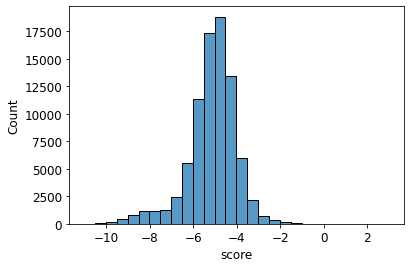

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

sns.histplot(data=next_df, x="score", binwidth=0.5)

In [ ]:
next_df['rdkit_smiles'] = next_df['SMILES'].apply(curate_data.base_smiles_from_smiles)

In [ ]:
# curate data

# column: Response values column
column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100

# compound_id: Compound ID column
compound_id = 'ID'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       next_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (83245, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [ID, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (83244, 8)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
curated_df.head(10)

,ID,SMILES,score,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CPD000650511,COc1ccc(cc1)C2N3[C@@H](Cc4c2[nH]c5ccccc45)C(=O...,-11.024,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,NaN,-0.0,0
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3c...,-10.762,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,NaN,-0.0,0
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c...,-10.621,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,NaN,-0.0,0
3,CPD002370502,Cc1cccc(c1)n2c(CC3=CC(=O)NC(=O)N3)nnc2SCC(=O)c...,-10.564,Cc1cccc(-n2c(Cc3cc(=O)[nH]c(=O)[nH]3)nnc2SCC(=...,-10.564,NaN,-0.0,0
4,CPD002487882,C[C@@H](NC(=O)COc1ccc2C(=O)C(=C(C)Oc2c1)c3ccc(...,-10.542,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,NaN,-0.0,0
5,CPD000558924,Cc1ccc2nc(nc(c3ccccc3)c2c1)N4CCN(CC4)C(=O)CCCC...,-10.500,Cc1ccc2nc(N3CCN(C(=O)CCCC(=O)O)CC3)nc(-c3ccccc...,-10.500,NaN,-0.0,0
6,CPD002455542,Cc1ccc2nc(nc(c3ccccc3)c2c1)[NH+]4CCN(CC4)C(=O)...,-10.500,Cc1ccc2nc([NH+]3CCN(C(=O)CCCC(=O)[O-])CC3)nc(-...,-10.500,NaN,-0.0,0
7,CPD002441515,Nc1ccc(C(=O)O)c(c1)[N+](=O)[O-],-10.458,Nc1ccc(C(=O)O)c([N+](=O)[O-])c1,-10.458,NaN,-0.0,0
8,CPD002484376,Cc1ccc(cc1C)c2c(C)sc(NC(=O)CC3(CC(=O)O)CCCC3)c...,-10.444,Cc1ccc(-c2c(C)sc(NC(=O)CC3(CC(=O)O)CCCC3)c2C(N...,-10.444,NaN,-0.0,0
9,CPD002452965,Cn1c(SCC(=O)Nc2ccc(cc2)C(=O)O)nnc1c3ccc(Cl)cc3Cl,-10.444,Cn1c(SCC(=O)Nc2ccc(C(=O)O)cc2)nnc1-c1ccc(Cl)cc1Cl,-10.444,NaN,-0.0,0


In [ ]:
curated_df.to_csv('NExT_full_curated.csv')

Canonicalizing 1276 molecules...
Done
Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


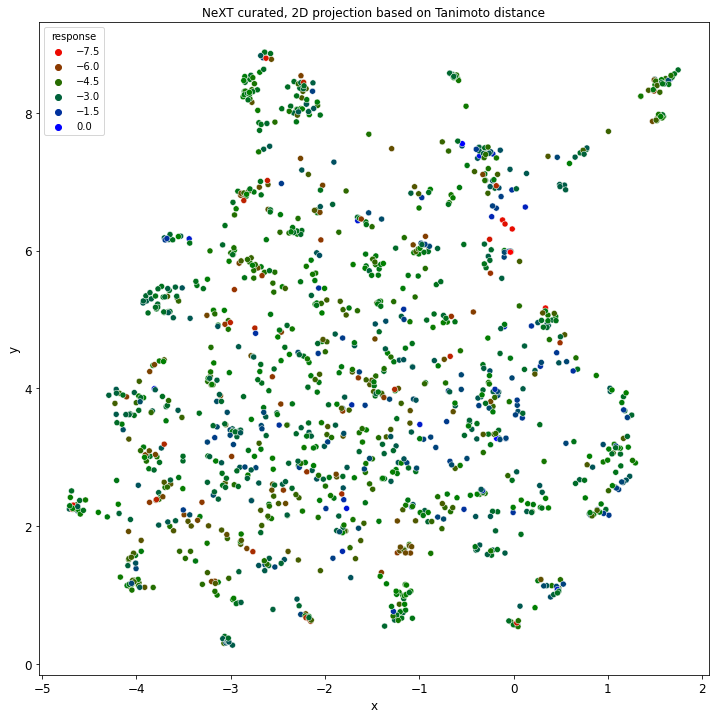

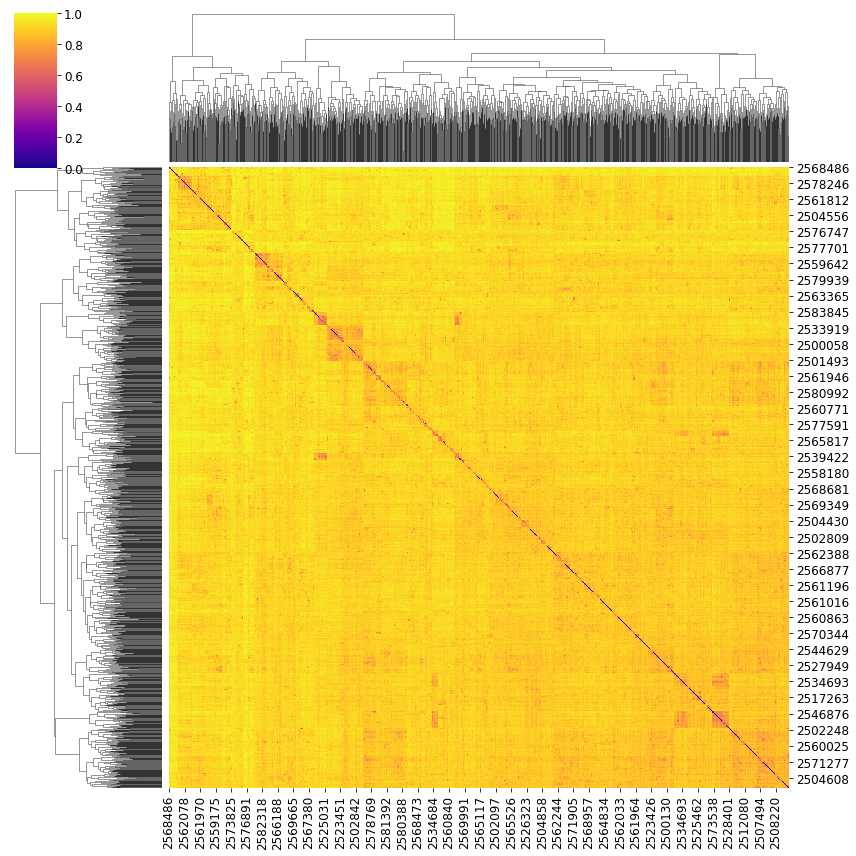

In [ ]:
dp.diversity_plots(dset_key = 'NExT_curated.csv',
                   datastore = False,
                   response_col = 'VALUE_NUM_mean',
                   max_for_mcs = 100)

,dist,subset
0,0.746835,all
1,0.732394,all
2,0.732394,all
3,0.416667,all
4,0.416667,all
...,...,...
1271,0.310345,all
1272,0.310345,all
1273,0.459459,all
1274,0.518519,all


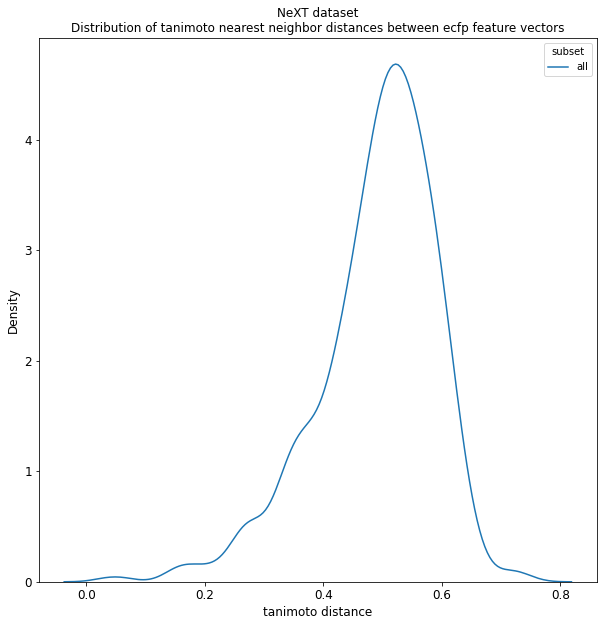

In [ ]:
dp.plot_tani_dist_distr(curated_df, smiles_col='rdkit_smiles', df_name='NeXT', plot_width=10)

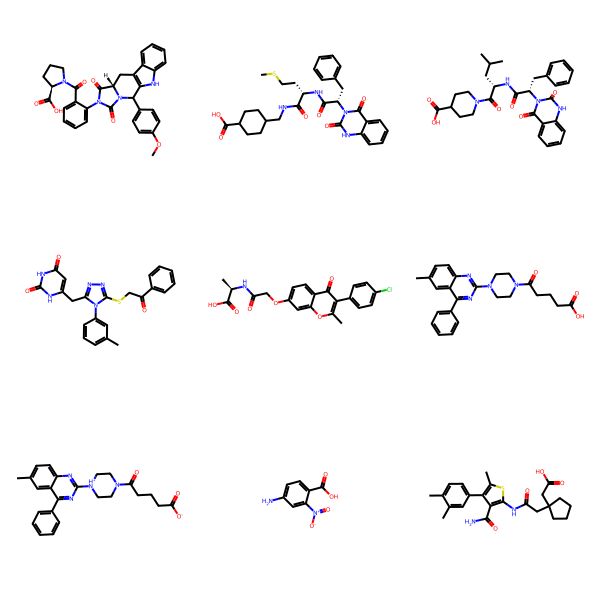

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice

molecules = [Chem.MolFromSmiles(smiles) for smiles in islice(curated_df['SMILES'], 9)]

Draw.MolsToGridImage(molecules)

# First Round

## Train rf model with next data from virtual screening

In [7]:
df_next_full = pd.read_csv('NExT_full_curated.csv')
df_next_full = df_next_full.dropna(subset=['rdkit_smiles'])
round1 = df_next_full.sample(n=2000, replace=False, random_state=46)

round1.to_csv('round1.csv')

In [8]:
round1.shape

(2000, 9)

In [11]:
featurizer = 'ecfp'
model_type = 'RF'
response_cols = ['VALUE_NUM_mean']

params={"datastore": "False",
        "save_results": "False",
        "id_col": "ID",
        "smiles_col": smiles_col,
        "response_cols": response_cols,
        "featurizer": featurizer,
        "model_type": model_type,
        "result_dir": 'drive/MyDrive/capstone/next/8w',
        "dataset_key": 'round1.csv'}
params["rf_estimators"] = 226
params["rf_max_depth"] = 251
params["rf_max_features"] = 189
tp = parse.wrapper(params)
pl = mp.ModelPipeline(tp)
pl.train_model()

INFO:ATOM:Created a dataset hash 'fb021df5741302e5332c54c1bfc964ac' from dataset_key '/content/drive/MyDrive/capstone/next/8w/round1.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset round1, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000


Number of features: 1024


INFO:ATOM:Wrote transformers to drive/MyDrive/capstone/next/8w/round1/RF_ecfp_scaffold_regression/4a622638-5152-4b2c-942c-94974ba537ed/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Fitting random forest model
INFO:ATOM:Fold 0: training r2_score = 0.897, validation r2_score = 0.338, test r2_score = 0.162
INFO:ATOM:Wrote model tarball to drive/MyDrive/capstone/next/8w/round1_model_4a622638-5152-4b2c-942c-94974ba537ed.tar.gz


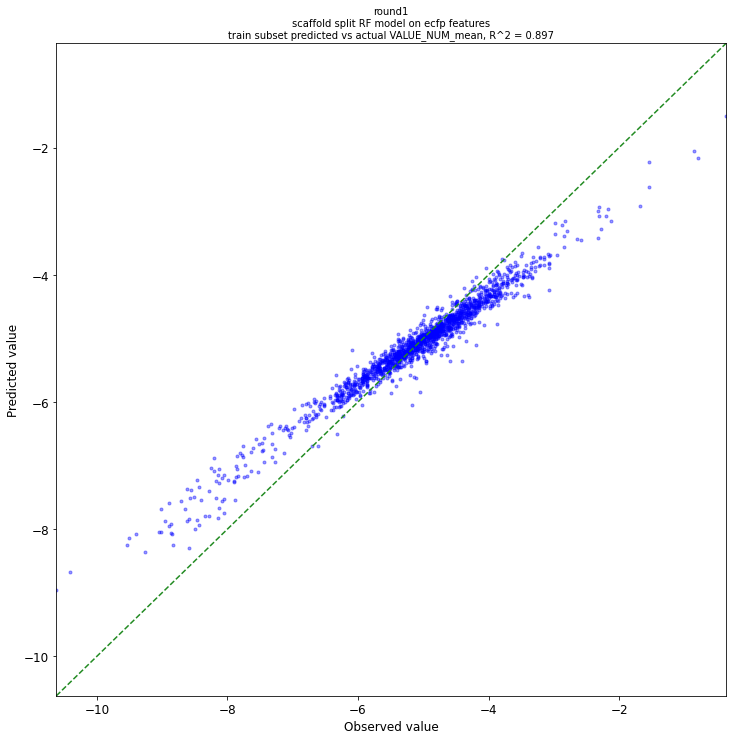

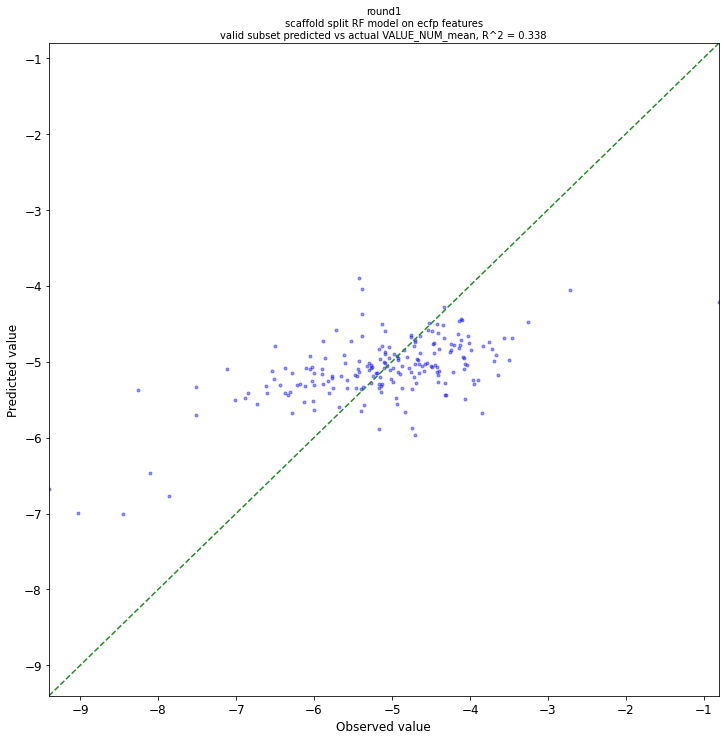

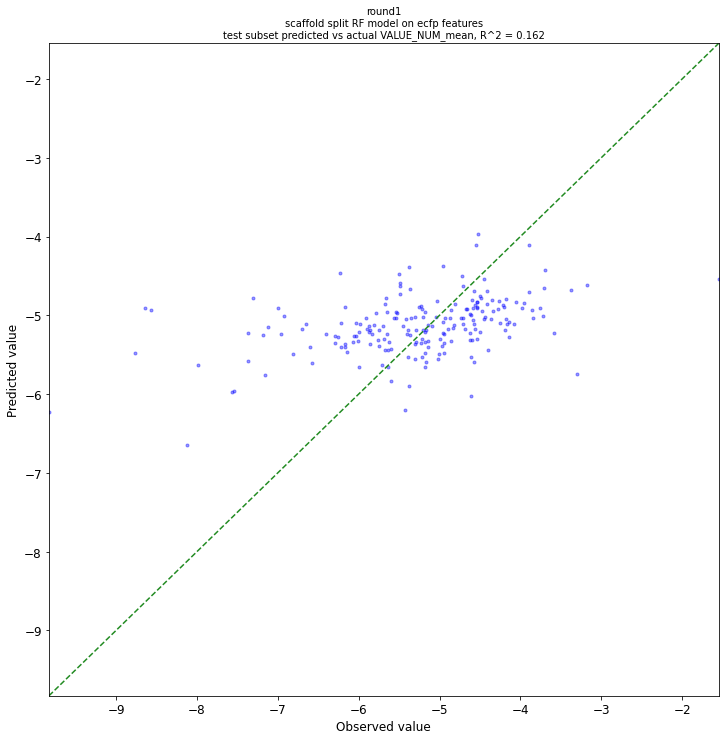

In [12]:
pp.plot_pred_vs_actual(pl)

## Model performance

In [ ]:
# get prediction with previous model
round1_result = pl.predict_full_dataset(df_next_full, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 1024


INFO:ATOM:Transforming response data
INFO:ATOM:Evaluating current model


In [ ]:
round1_result.head(10)

,ID,rdkit_smiles,VALUE_NUM_mean_actual,VALUE_NUM_mean_pred,VALUE_NUM_mean_std
0,CPD000650511,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,-6.495690,1.986525
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,-8.183558,2.598583
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,-9.057743,2.328026
3,CPD002370502,Cc1cccc(-n2c(Cc3cc(=O)[nH]c(=O)[nH]3)nnc2SCC(=...,-10.564,-6.322296,2.265602
4,CPD002487882,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,-6.552456,1.666487
5,CPD000558924,Cc1ccc2nc(N3CCN(C(=O)CCCC(=O)O)CC3)nc(-c3ccccc...,-10.500,-6.973624,1.613722
6,CPD002455542,Cc1ccc2nc([NH+]3CCN(C(=O)CCCC(=O)[O-])CC3)nc(-...,-10.500,-5.591049,1.417152
7,CPD002441515,Nc1ccc(C(=O)O)c([N+](=O)[O-])c1,-10.458,-7.188071,1.605822
8,CPD002484376,Cc1ccc(-c2c(C)sc(NC(=O)CC3(CC(=O)O)CCCC3)c2C(N...,-10.444,-6.911903,2.069540
9,CPD002452965,Cn1c(SCC(=O)Nc2ccc(C(=O)O)cc2)nnc1-c1ccc(Cl)cc1Cl,-10.444,-6.340389,1.706111


In [ ]:
def metric_print(option, test, prediction): 
  df_temp_1 = test.sort_values('VALUE_NUM_mean', ascending=True)
  df_temp_2 = prediction.sort_values('VALUE_NUM_mean_pred', ascending=True)
  if option == 'percentage': 
    n = int(input("Percentage: "))
    temp_1 = df_temp_1.head(int(len(df_temp_1)*(n/100)))
    temp_2 = df_temp_2.head(int(len(df_temp_2)*(n/100)))
    index_1 = temp_1["ID"].tolist()
    index_2 = temp_2["ID"].tolist()
    broad = len(list(set(index_1) & set(index_2)))/len(index_1)
    strick = len([i for i, j in zip(index_1, index_2) if i == j])/len(index_1)
  elif option == 'number': 
    n = int(input("Number: "))
    temp_1 = df_temp_1.head(n)
    temp_2 = df_temp_2.head(n)
    index_1 = temp_1["ID"].tolist()
    index_2 = temp_2["ID"].tolist()
    broad = len(list(set(index_1) & set(index_2)))/len(index_1)
    strick = len([i for i, j in zip(index_1, index_2) if i == j])/len(index_1)
  else: 
    sys.exit("'Please enter \'percentage\' or \'number\' '")
  print("strictly ranking the compounds:" + str(strick) )
  print('how many compounds in the defined range are the same:' + str(broad))

In [ ]:
# compare top 20% of the 83244 melecules in the test set, 45.93% of them are same. 
metric_print('percentage', test=df_next_full, prediction=round1_result)

Percentage: 20
strictly ranking the compounds:6.00672753483902e-05
how many compounds in the defined range are the same:0.45933445458913985


## Select top 2000 molecules for next round

In [ ]:
round1_output = round1_result.sort_values('VALUE_NUM_mean_pred', ascending=True).head(2000)

In [ ]:
round1_origin_df = df_next_full[df_next_full['ID'].isin(round1_output.ID.tolist())].iloc[:,1:]
round1_origin_df.head()

,ID,SMILES,score,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CPD000650511,COc1ccc(cc1)C2N3[C@@H](Cc4c2[nH]c5ccccc45)C(=O...,-11.024,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,NaN,-0.0,0
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3c...,-10.762,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,NaN,-0.0,0
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c...,-10.621,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,NaN,-0.0,0
4,CPD002487882,C[C@@H](NC(=O)COc1ccc2C(=O)C(=C(C)Oc2c1)c3ccc(...,-10.542,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,NaN,-0.0,0
5,CPD000558924,Cc1ccc2nc(nc(c3ccccc3)c2c1)N4CCN(CC4)C(=O)CCCC...,-10.500,Cc1ccc2nc(N3CCN(C(=O)CCCC(=O)O)CC3)nc(-c3ccccc...,-10.500,NaN,-0.0,0


# Second Round

## RF model training

In [ ]:
round2 = pd.concat([round1, round1_origin_df])

In [ ]:
round2 = round2.iloc[:,1:5]

In [ ]:
round2.head()

,ID,SMILES,score,rdkit_smiles
31362,CPD002409748,CSc1nc(C)c(CCC(=O)Nc2nc(cs2)c3ccc4OCCc4c3)c(C)n1,-5.297,CSc1nc(C)c(CCC(=O)Nc2nc(-c3ccc4c(c3)CCO4)cs2)c...
48949,CPD000108966,O=C(CCc1ccccc1)Nc2ccc(NC(=O)c3ccco3)cc2,-4.834,O=C(CCc1ccccc1)Nc1ccc(NC(=O)c2ccco2)cc1
590,CPD002441018,Nc1cc(ccc1S(=O)(=O)O)S(=O)(=O)[O-].[Na+],-9.014,Nc1cc(S(=O)(=O)[O-])ccc1S(=O)(=O)O
46688,CPD002427050,Cc1ccc(s1)S(=O)(=O)NC(c2ccccc2)c3ccccn3,-4.891,Cc1ccc(S(=O)(=O)NC(c2ccccc2)c2ccccn2)s1
20642,CPD002410329,COc1ccc(NC(=O)CCSc2nnc3scc(c4ccc(Cl)cc4)n23)cc1,-5.654,COc1ccc(NC(=O)CCSc2nnc3scc(-c4ccc(Cl)cc4)n23)cc1


In [ ]:
# curate data

# column: Response values column
column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100

# compound_id: Compound ID column
compound_id = 'ID'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

round2 = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       round2, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (4000, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [ID, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (3899, 8)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
round2.to_csv('round2.csv')

In [13]:
featurizer = 'ecfp'
model_type = 'RF'
response_cols = ['VALUE_NUM_mean']

params={"datastore": "False",
        "save_results": "False",
        "id_col": "ID",
        "smiles_col": smiles_col,
        "response_cols": response_cols,
        "featurizer": featurizer,
        "model_type": model_type,
        "result_dir": 'drive/MyDrive/capstone/next/8w',
        "dataset_key": 'round2.csv'}

params["rf_estimators"] = 226
params["rf_max_depth"] = 251
params["rf_max_features"] = 189
tp = parse.wrapper(params)
pl = mp.ModelPipeline(tp)
pl.train_model()

INFO:ATOM:Created a dataset hash 'e34e663844ffc1558f311927bf952a8f' from dataset_key '/content/drive/MyDrive/capstone/next/8w/round2.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset round2, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 1024


INFO:ATOM:Wrote transformers to drive/MyDrive/capstone/next/8w/round2/RF_ecfp_scaffold_regression/8cb5cf36-96ab-4775-b785-85fb285671fd/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Fitting random forest model
INFO:ATOM:Fold 0: training r2_score = 0.957, validation r2_score = 0.082, test r2_score = 0.190
INFO:ATOM:Wrote model tarball to drive/MyDrive/capstone/next/8w/round2_model_8cb5cf36-96ab-4775-b785-85fb285671fd.tar.gz


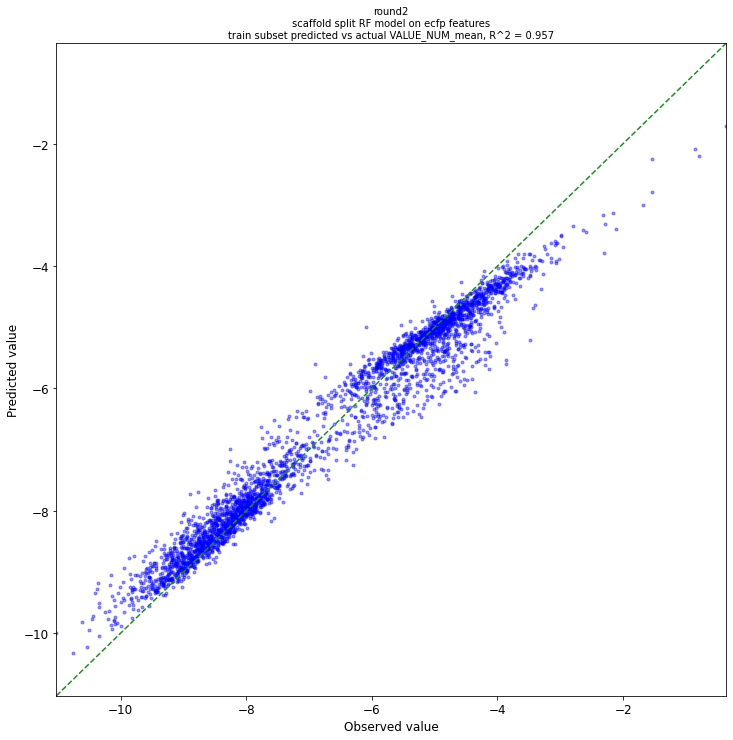

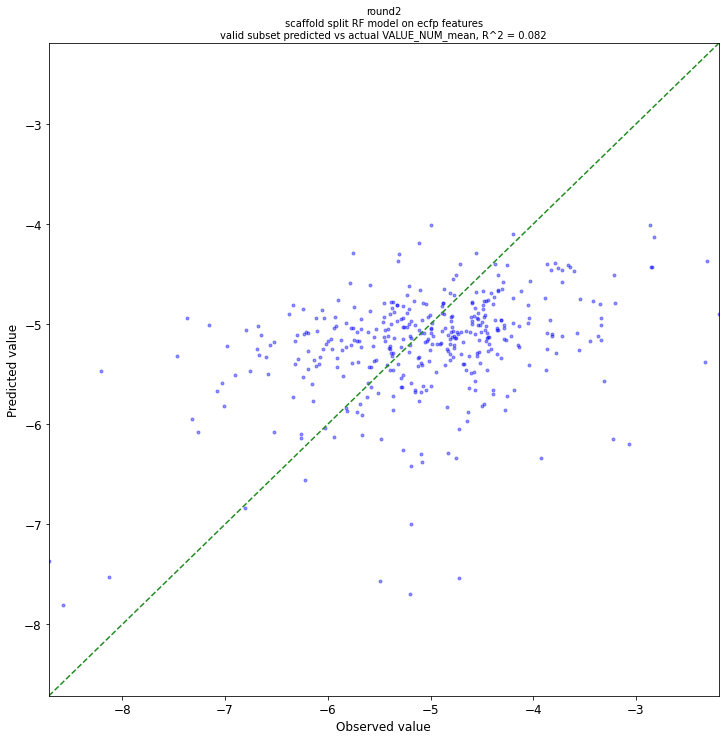

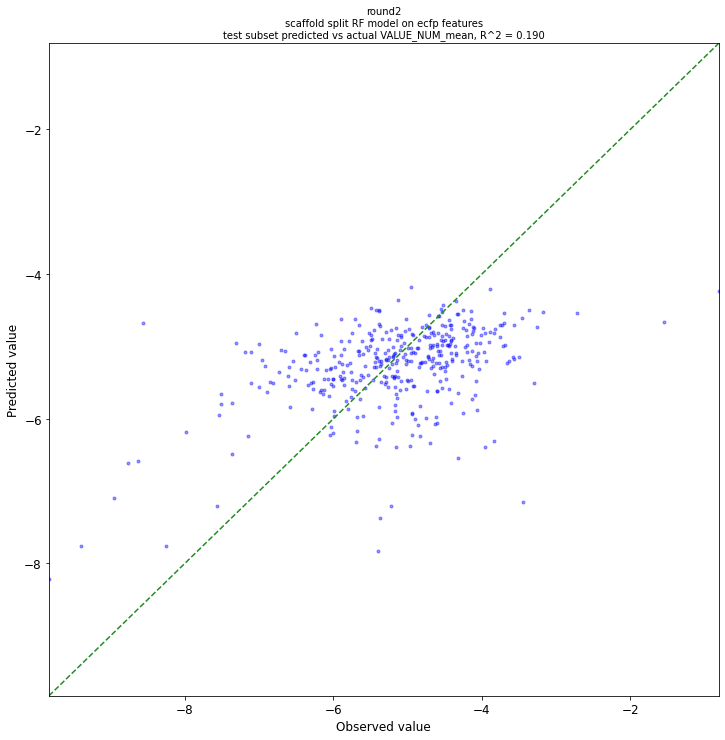

In [14]:
pp.plot_pred_vs_actual(pl)

## Model performance

In [ ]:
round2_result = pl.predict_on_dataframe(df_next_full, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 1024


INFO:ATOM:Transforming response data
INFO:ATOM:Evaluating current model


In [ ]:
round2_result.head()

,ID,rdkit_smiles,actual,pred,std
0,CPD000650511,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,-10.141579,1.419113
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,-10.341301,0.894817
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,-9.837170,1.316652
3,CPD002370502,Cc1cccc(-n2c(Cc3cc(=O)[nH]c(=O)[nH]3)nnc2SCC(=...,-10.564,-6.500500,1.287370
4,CPD002487882,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,-10.144389,0.914695


In [ ]:
def metric_print(option, test, prediction): 
  df_temp_1 = test.sort_values('VALUE_NUM_mean', ascending=True)
  df_temp_2 = prediction.sort_values('pred', ascending=True)
  if option == 'percentage': 
    n = int(input("Percentage: "))
    temp_1 = df_temp_1.head(int(len(df_temp_1)*(n/100)))
    temp_2 = df_temp_2.head(int(len(df_temp_2)*(n/100)))
    index_1 = temp_1.index.tolist()
    index_2 = temp_2.index.tolist()
    broad = len(list(set(index_1) & set(index_2)))/len(index_1)
    strick = len([i for i, j in zip(index_1, index_2) if i == j])/len(index_1)
  elif option == 'number': 
    n = int(input("Number: "))
    temp_1 = df_temp_1.head(n)
    temp_2 = df_temp_2.head(n)
    index_1 = temp_1.index.tolist()
    index_2 = temp_2.index.tolist()
    broad = len(list(set(index_1) & set(index_2)))/len(index_1)
    strick = len([i for i, j in zip(index_1, index_2) if i == j])/len(index_1)
  else: 
    sys.exit("'Please enter \'percentage\' or \'number\' '")
  print("strictly ranking the compounds:" + str(strick) )
  print('how many compounds in the defined range are the same:' + str(broad))

In [ ]:
# compare top 20% of the 83244 melecules in the test set, 43.37% of them are same, worse than 45.93% in round 1. 
metric_print('percentage', test=df_next_full, prediction=round2_result)

Percentage: 20
strictly ranking the compounds:6.00672753483902e-05
how many compounds in the defined range are the same:0.43368572801537725


## Select top 2000 molecules for next round

In [ ]:
round2_output = round2_result.sort_values('pred', ascending=True).head(2000)

In [ ]:
round2_origin_df = df_next_full[df_next_full['ID'].isin(round2_output.ID.tolist())].iloc[:,1:]
round2_origin_df.head()

,ID,SMILES,score,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CPD000650511,COc1ccc(cc1)C2N3[C@@H](Cc4c2[nH]c5ccccc45)C(=O...,-11.024,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,NaN,-0.0,0
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c3c...,-10.762,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,NaN,-0.0,0
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n2c(=O)[nH]c...,-10.621,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,NaN,-0.0,0
4,CPD002487882,C[C@@H](NC(=O)COc1ccc2C(=O)C(=C(C)Oc2c1)c3ccc(...,-10.542,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,NaN,-0.0,0
5,CPD000558924,Cc1ccc2nc(nc(c3ccccc3)c2c1)N4CCN(CC4)C(=O)CCCC...,-10.500,Cc1ccc2nc(N3CCN(C(=O)CCCC(=O)O)CC3)nc(-c3ccccc...,-10.500,NaN,-0.0,0


# Third Round

## RF model training

In [ ]:
round3 = pd.concat([round2, round2_origin_df])
round3 = round3.iloc[:,0:4]
round3.head()

,ID,SMILES,score,rdkit_smiles
0,CPD002409748,CSc1nc(C)c(CCC(=O)Nc2nc(cs2)c3ccc4OCCc4c3)c(C)n1,-5.297,CSc1nc(C)c(CCC(=O)Nc2nc(-c3ccc4c(c3)CCO4)cs2)c...
1,CPD000108966,O=C(CCc1ccccc1)Nc2ccc(NC(=O)c3ccco3)cc2,-4.834,O=C(CCc1ccccc1)Nc1ccc(NC(=O)c2ccco2)cc1
2,CPD002441018,Nc1cc(ccc1S(=O)(=O)O)S(=O)(=O)[O-].[Na+],-9.014,Nc1cc(S(=O)(=O)[O-])ccc1S(=O)(=O)O
3,CPD002427050,Cc1ccc(s1)S(=O)(=O)NC(c2ccccc2)c3ccccn3,-4.891,Cc1ccc(S(=O)(=O)NC(c2ccccc2)c2ccccn2)s1
4,CPD002410329,COc1ccc(NC(=O)CCSc2nnc3scc(c4ccc(Cl)cc4)n23)cc1,-5.654,COc1ccc(NC(=O)CCSc2nnc3scc(-c4ccc(Cl)cc4)n23)cc1


In [ ]:
# curate data

# column: Response values column
column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100

# compound_id: Compound ID column
compound_id = 'ID'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

round3 = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       round3, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (5899, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [ID, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (4486, 8)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
round3.to_csv('round3.csv')

In [15]:
featurizer = 'ecfp'
model_type = 'RF'
response_cols = ['VALUE_NUM_mean']

params={"datastore": "False",
        "save_results": "False",
        "id_col": "ID",
        "smiles_col": smiles_col,
        "response_cols": response_cols,
        "featurizer": featurizer,
        "model_type": model_type,
        "result_dir": 'drive/MyDrive/capstone/next/8w',
        "dataset_key": 'round3.csv'}

params["rf_estimators"] = 226
params["rf_max_depth"] = 251
params["rf_max_features"] = 189
tp = parse.wrapper(params)
pl = mp.ModelPipeline(tp)
pl.train_model()

INFO:ATOM:Created a dataset hash '024200ea6db98b6ac8a9727187c4593e' from dataset_key '/content/drive/MyDrive/capstone/next/8w/round3.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset round3, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000


Number of features: 1024


INFO:ATOM:Wrote transformers to drive/MyDrive/capstone/next/8w/round3/RF_ecfp_scaffold_regression/3c8c3f44-30d3-4e2b-aaaf-38a566a55488/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Fitting random forest model
INFO:ATOM:Fold 0: training r2_score = 0.955, validation r2_score = 0.070, test r2_score = 0.022
INFO:ATOM:Wrote model tarball to drive/MyDrive/capstone/next/8w/round3_model_3c8c3f44-30d3-4e2b-aaaf-38a566a55488.tar.gz


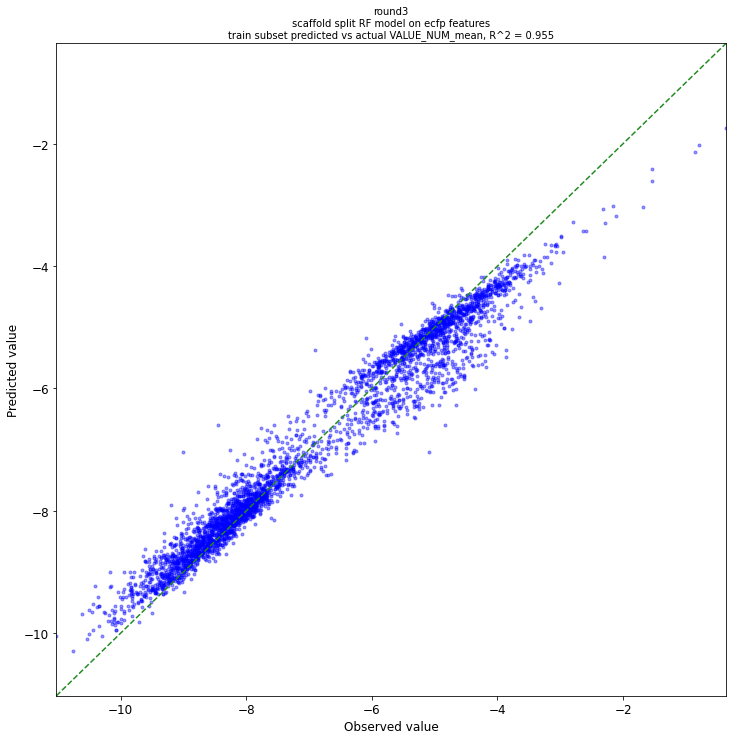

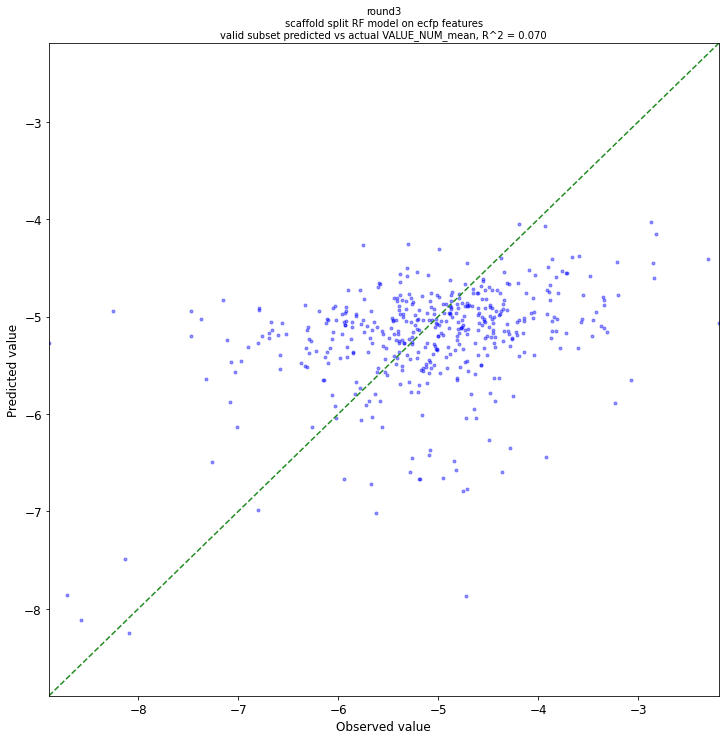

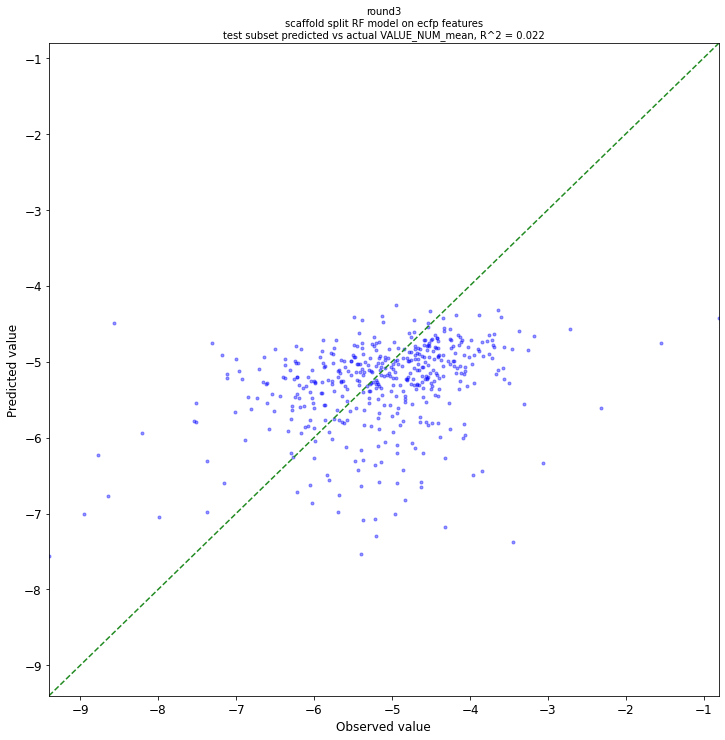

In [16]:
pp.plot_pred_vs_actual(pl)

## Model performance

In [ ]:
round3_result = pl.predict_on_dataframe(df_next_full, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 1024


INFO:ATOM:Transforming response data
INFO:ATOM:Evaluating current model


In [ ]:
# compare top 20% of the 8 melecules in the test set, 41.5% of them are same, worse than 43.37 in round 2. 
metric_print('percentage', test=df_next_full, prediction=round3_result)

Percentage: 20
strictly ranking the compounds:6.00672753483902e-05
how many compounds in the defined range are the same:0.4152450744834214


## Select top 2000 molecules for next round




In [ ]:
round3_output = round3_result.sort_values('pred', ascending=True).head(2000)

In [ ]:
round3_origin_df = df_next_full[df_next_full['ID'].isin(round3_output.ID.tolist())].iloc[:,1:]
round3_origin_df.head()

# Forth Round

## RF model training

In [ ]:
round4 = pd.concat([round3, round3_output])
round4 = round4.iloc[:,0:4]
round4.head()

,compound_id,smiles,score,rdkit_smiles
0,CPD002441352,CCCCCCCCCOc1ccc(cc1)C(=O)c2ccccc2,-3.610,CCCCCCCCCOc1ccc(C(=O)c2ccccc2)cc1
1,CPD002394839,Fc1ccc(cc1)N(CCC#N)C(=O)CSc2nnnn2c3cccc(Cl)c3,-5.536,N#CCCN(C(=O)CSc1nnnn1-c1cccc(Cl)c1)c1ccc(F)cc1
2,CPD000324518,O=C(Nc1nnc(o1)c2ccco2)c3ccc(cc3)S(=O)(=O)N4CCOCC4,-4.772,O=C(Nc1nnc(-c2ccco2)o1)c1ccc(S(=O)(=O)N2CCOCC2...
3,CPD002399657,CC(Sc1nc(Cc2ccccc2)c(C)[nH]1)C(=O)Nc3cccc(c3)S...,-2.117,Cc1[nH]c(SC(C)C(=O)Nc2cccc(S(=O)(=O)N(C)C)c2)n...
4,CPD000623239,CCOC(=O)N1CCC(CC1)NC(=O)CS(=O)Cc2nc(oc2C)c3ccc...,-3.545,CCOC(=O)N1CCC(NC(=O)C[S+]([O-])Cc2nc(-c3ccccc3...


In [ ]:
# curate data

# column: Response values column
column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

round4 = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       round4, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (6104, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (4104, 8)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
# The dataset with duplicate removel has a same size as the one in round3, thus we decide to stop the process. 